<a href="https://colab.research.google.com/github/paulchworks/main/blob/master/ICT619_Artificial_Intelligence_Assignment_and_Project_EUR_USD_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ICT619 Artificial Intelligence Assignment and Project - EUR/USD Prediction Model**  

*   34165578 CHOW KUM SIONG (PAUL) 
*   34298294 NYAN WIN MYINT

In [1]:
import sys

# Confirm that we're using Python 3
assert sys.version_info.major == 3, 'Oops, not running Python 3. Use Runtime > Change runtime type'

In [2]:
# TensorFlow and tf.keras
print("Installing dependencies for Colab environment")
!pip install -Uq grpcio==1.26.0

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os, re, time, json
import subprocess

print('TensorFlow version: {}'.format(tf.__version__))

Installing dependencies for Colab environment
TensorFlow version: 2.8.2


In [3]:
from io import StringIO
import requests
import json
import pandas as pd
import numpy as np
import types


In [4]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = 'https://drive.google.com/open?id=1KwyaeNvkGAVM7w6qGbedgFSlgZTu1hvG'

In [6]:
fluff, id = link.split('=')
print (id) # Verify that id after '='

1KwyaeNvkGAVM7w6qGbedgFSlgZTu1hvG


In [7]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('220524-220607_EURUSD_historical_data.csv')  
df_EURUSD = pd.read_csv('220524-220607_EURUSD_historical_data.csv')

In [8]:
df_EURUSD = df_EURUSD[df_EURUSD.CLOSE != "."]
print(df_EURUSD.shape)
df_EURUSD.head(20)

(932, 5)


,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,5/24/2022 7:15,1.07325,1.07162,1.07238,1.07236
1,5/24/2022 7:30,1.07345,1.07196,1.07240,1.07337
2,5/24/2022 7:45,1.07362,1.07248,1.07338,1.07309
3,5/24/2022 8:00,1.07336,1.07167,1.07306,1.07183
4,5/24/2022 8:15,1.07184,1.07055,1.07181,1.07121
5,5/24/2022 8:30,1.07154,1.07012,1.07115,1.07051
6,5/24/2022 8:45,1.07178,1.07033,1.07051,1.07046
7,5/24/2022 9:00,1.07152,1.07042,1.07047,1.07144
8,5/24/2022 9:15,1.07193,1.07138,1.07148,1.07144
9,5/24/2022 9:30,1.07150,1.07054,1.07147,1.07085


In [9]:
df_EURUSD.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HIGH,932.0,1.072236,0.003150,1.06451,1.070298,1.072620,1.074505,1.07867
LOW,932.0,1.071472,0.003232,1.06275,1.069380,1.071885,1.073547,1.07837
OPEN,932.0,1.071858,0.003199,1.06284,1.069850,1.072285,1.074012,1.07862
CLOSE,932.0,1.071858,0.003198,1.06281,1.069835,1.072280,1.074012,1.07865


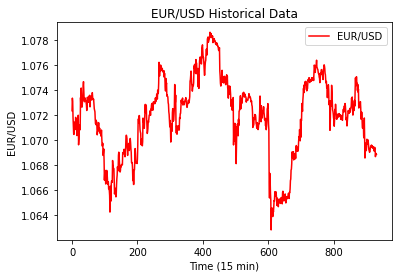

In [10]:
import matplotlib.pyplot as plt
df_EURUSD_plot = df_EURUSD.iloc[:,1:2].values.astype(float)
# Visualising the Data
plt.plot(df_EURUSD.CLOSE, color = 'red', label = 'EUR/USD')
plt.title('EUR/USD Historical Data')
plt.xlabel('Time (15 min)')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

In [11]:
#import packages
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import load_model

In [12]:
# defining the batch size and number of epochs
# timesteps must be well within the number of entries in the dataset
# try reduce the no of epochs at later stage
#default parameters to start with:
#batch_size = 64
#epochs = 10
#timesteps = 20

batch_size = 10
epochs = 300
timesteps = 5

<h1> Batch-size and trainings-set size </h1>

With stateful LSTMs the trainings-set size must be divisible without remainder by the batch-size (modulo = 0)

In [13]:
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

In [14]:
length = get_train_length(df_EURUSD, batch_size, 0.1)
print(length)

740
750
760
770
780
790
800
810
820
830
830


If timesteps is 5, the LSTM has learned from 5 timesteps then predicts the next 5 timesteps in the future, the whole sliding window slides one timestep to the right, and the whole procedure restarts. In this case, the timestep = 5, where T-5 = current 15-min window.

In [15]:
#Adding timesteps * 2
upper_train = length + timesteps*2
df_EURUSD_train = df_EURUSD[0:upper_train]
training_set = df_EURUSD_train.iloc[:,1:2].values
training_set.shape


(840, 1)

In [16]:
# Feature Scaling
#scale between 0 and 1. the weights are easier to find.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled.shape

(840, 1)

1. Input our data in the form of a 3D array to the LSTM model. 
2. Create data in 5 timesteps before using numpy to convert it into an array. 

In [17]:
X_train = []
y_train = []

# Creating a data structure with n timesteps

print(length + timesteps)
for i in range(timesteps, length + timesteps): 
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i:i+timesteps,0])

print(len(X_train))
print(len(y_train))
#create X_train matrix
#5 items per array (timestep) 
print(X_train[0:2])
print(np.array(X_train).shape)
#create Y_train matrix
#5 items per array (timestep) 
print(y_train[0:2])
print(np.array(y_train).shape)

835
830
830
[array([0.61723164, 0.63135593, 0.64336158, 0.625     , 0.51765537]), array([0.63135593, 0.64336158, 0.625     , 0.51765537, 0.49646893])]
(830, 5)
[array([0.49646893, 0.51341808, 0.4950565 , 0.5240113 , 0.49364407]), array([0.51341808, 0.4950565 , 0.5240113 , 0.49364407, 0.47951977])]
(830, 5)


3.Convert the data into a 3D array with X_train samples, 5 timestamps, and one feature at each step.

In [18]:
# Reshaping
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)

(830, 5, 1)
(830, 5, 1)


In [19]:
# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
import h5py

The LSTM layer is added with the following arguments: 10 units is the dimensionality of the output space, return_sequences=True is necessary for stacking LSTM layers so the consequent LSTM layer has a three-dimensional sequence input, and input_1_mae is the shape of the training dataset. Compiled our model using the Adam optimizer and set MAE as loss function. 

In [20]:
# Initialising the LSTM Model with MAE Loss-Function
# Using Functional API

inputs_1_mae = Input(batch_shape=(batch_size,timesteps,1))
#each layer is the input of the next layer
lstm_1_mae = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mae)
lstm_2_mae = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mae)

output_1_mae = Dense(units = 1)(lstm_2_mae)

regressor_mae = Model(inputs=inputs_1_mae, outputs = output_1_mae)

#adam is fast starting off and then gets slower and more precise
#mae -> mean absolute error loss function
regressor_mae.compile(optimizer='adam', loss = 'mae')
regressor_mae.summary()

2022-07-03 06:30:32.828160: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(10, 5, 1)]              0         
                                                                 
 lstm (LSTM)                 (10, 5, 10)               480       
                                                                 
 lstm_1 (LSTM)               (10, 5, 10)               840       
                                                                 
 dense (Dense)               (10, 5, 1)                11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [21]:
import tensorflow as tf
from keras import backend as K

K.set_session(K.tf.compat.v1.Session(config=K.tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

To decide how to handle the memory each LSTM Cell has :

input (what to let in),
forget (what to forget) and
output (what to write to the output) LSTM Cell State is its memory LSTM Hidden State is equivalent to the Cell output: lstm_hidden_state_size (number of neurons = memory cells) = lstm_outputs_size Parameters:
weights for the inputs (lstm_inputs_size)
weights for the outputs (lstm_outputs_size)
bias variable Result from previous point - for all 3 Gates and for Cell State ( = 4)

\begin{equation}
\textbf{PARAMETERS} = \textbf4 \times \textbf{ LSTM outputs size} \times (\textbf{weights LSTM inputs size} + \textbf{weights LSTM outputs size} + 1 \textbf{ bias variable}) \end{equation}

In [22]:
# 1st LSTM Layer
parameters = 4 * 10 * (1 + 10 + 1)
print(parameters)

480


In [23]:
parameters = 4 * 10 * (10 + 10 + 1)
print(parameters)

840


Fitted the model to run for 300 epochs (the epochs are the number of times the learning algorithm will work through the entire training set) with a batch size of 10.

In [24]:
#Stateful
for i in range(epochs):
    print("Epoch: " + str(i))
    #run through all data but the cell, hidden state are used for the next batch.
    regressor_mae.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    #resets only the states but the weights, cell and hidden are kept.
    regressor_mae.reset_states()
    
#Stateless
#between the batches the cell and hidden states are lost.
#regressor_mae.fit(X_train, y_train, shuffle=False, epochs = epochs, batch_size = batch_size)

Epoch: 0
83/83 [==============================] - 4s 4ms/step - loss: 0.1797
Epoch: 1
83/83 [==============================] - 0s 4ms/step - loss: 0.1579
Epoch: 2
83/83 [==============================] - 0s 5ms/step - loss: 0.1481
Epoch: 3
83/83 [==============================] - 0s 4ms/step - loss: 0.1427
Epoch: 4
83/83 [==============================] - 0s 5ms/step - loss: 0.1343
Epoch: 5
83/83 [==============================] - 0s 4ms/step - loss: 0.1280
Epoch: 6
83/83 [==============================] - 0s 5ms/step - loss: 0.1244
Epoch: 7
83/83 [==============================] - 1s 7ms/step - loss: 0.1188
Epoch: 8
83/83 [==============================] - 1s 7ms/step - loss: 0.1163
Epoch: 9
83/83 [==============================] - 1s 8ms/step - loss: 0.1092
Epoch: 10
83/83 [==============================] - 1s 9ms/step - loss: 0.1092
Epoch: 11
83/83 [==============================] - 1s 8ms/step - loss: 0.1015
Epoch: 12
83/83 [==============================] - 1s 7ms/step - loss: 0.1

In [25]:
#save model
import h5py
regressor_mae.save(filepath="EURUSD_with_mae_30_ts.h5")

In [26]:
#load model
import h5py
regressor_mae = load_model(filepath="EURUSD_with_mae_30_ts.h5")

In [27]:
def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            print(x)
    return (max(test_length_values))

In [28]:
test_length = get_test_length(df_EURUSD, batch_size)
print(test_length)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
print(testset_length)

740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
920
80


In [29]:
print(upper_train, upper_test, len(df_EURUSD))

840 930 932


In [30]:
# construct test set

#subsetting
df_EURUSD_test = df_EURUSD[upper_train:upper_test] 
test_set = df_EURUSD_test.iloc[:,1:2].values

#scaling
scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set))

#creating input data
X_test = []
for i in range(timesteps, testset_length + timesteps):
    X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
X_test = np.array(X_test)

#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [31]:
#print(X_test)
X_test.shape

(80, 5, 1)

In [32]:
#prediction
predicted_bcg_values_test_mae = regressor_mae.predict(X_test, batch_size=batch_size)
regressor_mae.reset_states()

print(predicted_bcg_values_test_mae.shape)

#reshaping
predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae, 
                                       (predicted_bcg_values_test_mae.shape[0], 
                                        predicted_bcg_values_test_mae.shape[1]))

print(predicted_bcg_values_test_mae.shape)
#inverse transform
predicted_bcg_values_test_mae = sc.inverse_transform(predicted_bcg_values_test_mae)


#creating y_test data
y_test = []
for j in range(0, testset_length - timesteps):
    y_test = np.append(y_test, predicted_bcg_values_test_mae[j, timesteps-1])

# reshaping
y_test = np.reshape(y_test, (y_test.shape[0], 1))

print(y_test.shape)
#print(y_test)

(80, 5, 1)
(80, 5)
(75, 1)


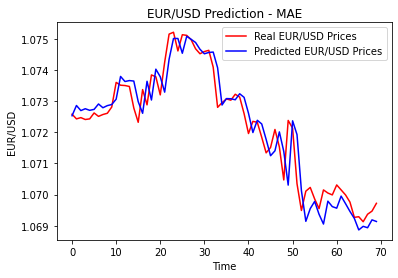

In [33]:
# Visualising the results
plt.plot(test_set[timesteps:len(y_test)].astype(float), color = 'red', label = 'Real EUR/USD Prices')
plt.plot(y_test[0:len(y_test) - timesteps].astype(float), color = 'blue', label = 'Predicted EUR/USD Prices')
plt.title('EUR/USD Prediction - MAE')
plt.xlabel('Time')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

In [34]:
#MSE (mean squared error)
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps]))
print(rmse)

0.0005743488850686021


In [35]:
#MAE (mean absolute error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps])
print(mae)

0.00043205480412074375


In [36]:
# Initialising the LSTM Model with MSE Loss Function

inputs_1_mse = Input(batch_shape=(batch_size,timesteps,1))
lstm_1_mse = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mse)
lstm_2_mse = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mse)

output_1_mse = Dense(units = 1)(lstm_2_mse)

regressor_mse = Model(inputs=inputs_1_mse, outputs = output_1_mse)

#mse -> mean squared error as loss function
regressor_mse.compile(optimizer='adam', loss = 'mse')
regressor_mse.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(10, 5, 1)]              0         
                                                                 
 lstm_2 (LSTM)               (10, 5, 10)               480       
                                                                 
 lstm_3 (LSTM)               (10, 5, 10)               840       
                                                                 
 dense_1 (Dense)             (10, 5, 1)                11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [37]:
import tensorflow as tf
from keras import backend as K

K.set_session(K.tf.compat.v1.Session(config=K.tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

In [38]:
epochs = 300
for i in range(epochs):
    print("Epoch: " + str(i))
    regressor_mse.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    regressor_mse.reset_states()

Epoch: 0
83/83 [==============================] - 4s 5ms/step - loss: 0.0527
Epoch: 1
83/83 [==============================] - 0s 5ms/step - loss: 0.0344
Epoch: 2
83/83 [==============================] - 0s 5ms/step - loss: 0.0264
Epoch: 3
83/83 [==============================] - 0s 4ms/step - loss: 0.0222
Epoch: 4
83/83 [==============================] - 0s 5ms/step - loss: 0.0194
Epoch: 5
83/83 [==============================] - 0s 4ms/step - loss: 0.0176
Epoch: 6
83/83 [==============================] - 0s 5ms/step - loss: 0.0164
Epoch: 7
83/83 [==============================] - 0s 5ms/step - loss: 0.0156
Epoch: 8
83/83 [==============================] - 0s 5ms/step - loss: 0.0151
Epoch: 9
83/83 [==============================] - 0s 5ms/step - loss: 0.0147
Epoch: 10
83/83 [==============================] - 0s 5ms/step - loss: 0.0144
Epoch: 11
83/83 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch: 12
83/83 [==============================] - 0s 5ms/step - loss: 0.0

In [39]:
import h5py
regressor_mse.save(filepath="EURUSD_with_mse_30_ts.h5")

In [40]:
regressor_mse = load_model(filepath="EURUSD_with_mse_30_ts.h5")

In [41]:
predicted_bcg_values_test_mse = regressor_mse.predict(X_test, batch_size=batch_size)
regressor_mse.reset_states()

predicted_bcg_values_test_mse = np.reshape(predicted_bcg_values_test_mse, 
                                       (predicted_bcg_values_test_mse.shape[0], 
                                        predicted_bcg_values_test_mse.shape[1]))
predicted_bcg_values_test_mse = sc.inverse_transform(predicted_bcg_values_test_mse)

pred_mse = []

for j in range(0, testset_length - timesteps):
    pred_mse = np.append(pred_mse, predicted_bcg_values_test_mse[j, timesteps-1])

pred_mse = np.reshape(pred_mse, (pred_mse.shape[0], 1))

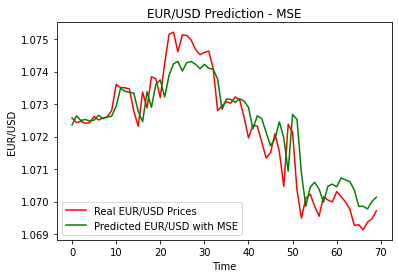

In [42]:
# Visualising the results
plt.plot(test_set[timesteps:len(pred_mse)].astype(float), color = 'red', label = 'Real EUR/USD Prices')
plt.plot(pred_mse[0:len(pred_mse) - timesteps], color = 'green', label = 'Predicted EUR/USD with MSE')
plt.title('EUR/USD Prediction - MSE')
plt.xlabel('Time')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set[timesteps:len(pred_mse)], pred_mse[0:len(pred_mse) - timesteps]))
print(rmse)

0.000675795513114765


In [44]:
mean = np.mean(np.float64(test_set[timesteps:len(pred_mse)]))
print(mean)

1.0722227142857144


In [45]:
rmse/mean * 100

0.0630275318840789

In [46]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_set[timesteps:len(pred_mse)], pred_mse[0:len(pred_mse) - timesteps])
print(mae)

0.0005200830127171097


In [47]:
mae/mean * 100

0.04850512918517818

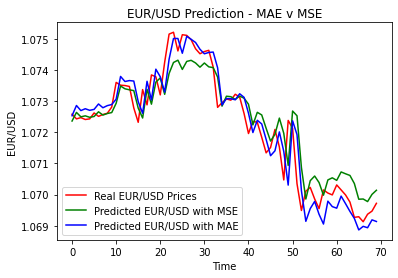

In [48]:
import matplotlib.pyplot as plt
plt.plot(test_set[timesteps:len(pred_mse)].astype(float), color = 'red', label = 'Real EUR/USD Prices')
plt.plot(pred_mse[0:len(pred_mse) - timesteps], color = 'green', label = 'Predicted EUR/USD with MSE')
plt.plot(y_test[0:len(y_test) - timesteps].astype(float), color = 'blue', label = 'Predicted EUR/USD with MAE')
plt.title('EUR/USD Prediction - MAE v MSE')
plt.xlabel('Time')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

## Next: Create and deploy a model endpoint


In [58]:
import pickle
filename = 'model.pkl'
pickle.dump(regressor_mse, open(filename, 'wb'))

2022-07-03 06:37:28.096298: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-07-03 06:37:31.728 Found untraced functions such as lstm_cell_6_layer_call_fn, lstm_cell_6_layer_call_and_return_conditional_losses, lstm_cell_7_layer_call_fn, lstm_cell_7_layer_call_and_return_conditional_losses while saving (showing 4 of 4). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: ram://434ed5d4-9a70-4f11-93f4-823be4a5b2c1/assets


2022-07-03 06:37:33.033 Assets written to: ram://434ed5d4-9a70-4f11-93f4-823be4a5b2c1/assets
2022-07-03 06:37:33.221 <keras.layers.recurrent.LSTMCell object at 0x7f995acc6dd0> has the same name 'LSTMCell' as a built-in Keras object. Consider renaming <class 'keras.layers.recurrent.LSTMCell'> to avoid naming conflicts when loading with `tf.keras.models.load_model`. If renaming is not possible, pass the object in the `custom_objects` parameter of the load function.
2022-07-03 06:37:33.223 <keras.layers.recurrent.LSTMCell object at 0x7f995addc3d0> has the same name 'LSTMCell' as a built-in Keras object. Consider renaming <class 'keras.layers.recurrent.LSTMCell'> to avoid naming conflicts when loading with `tf.keras.models.load_model`. If renaming is not possible, pass the object in the `custom_objects` parameter of the load function.


In [62]:
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import flask
from flask import Flask, render_template, request
import pickle
import numpy as np
from flask_ngrok import run_with_ngrok
import warnings
warnings.filterwarnings('ignore')

app = Flask(__name__)
run_with_ngrok(app)

model = pickle.load(open('model.pkl', 'rb'))

@app.route('/', methods=['GET'])
def home():
  return render_template('index.html')

@app.route('/', methods=['GET', "POST"])
def predict():
  input_values = [float(x) for x in request.form.values()]
  inp_features = [input_values]
  prediction = model.predict(inp_features)
  if prediction==1:
    return render_template('index.html', prediction_text='Death event took Place. Person is no more')
  else:
    return render_template('index.html', prediction_text='Death event not took Place. Person is alive')

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


2022-07-03 07:01:57.734  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://1fdc-34-80-21-218.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


#!pip install streamlit 
#Import streamlit
import streamlit as st
#Import NumPy and Pandas for data manipulation 
import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
#for encoding binary data to printable ASCII characters and decoding it  #back to binary form
import base64 

st.title('ForPredx App')
st.write("IMPORT DATA")
st.write("Import the time series CSV file. It should have two columns labelled as 'ds' and 'y'. The 'ds' column should be of DateTime format by Pandas. The 'y' column must be numeric representing the measurement to be forecasted.")

data = st.file_uploader('Upload here',type='csv')

if data is not None:
  appdata = pd.read_csv(data)  #read the data fro
  appdata['ds'] = pd.to_datetime(appdata['ds'],errors='coerce') 
  st.write(data) #display the data
  max_date = appdata['ds'].max() #compute latest date in the data 

st.write("SELECT FORECAST PERIOD") #text displayed

periods_input = st.number_input('How many days forecast do you want?', min_value = 1, max_value = 365)
#The minimum number of days a user can select is one, while the maximum is  #365 (yearly forecast) 

if data is not None:
  obj = Prophet() #Instantiate Chosen Model
  obj.fit(appdata) #fit the data 

#text to be displayed
st.write("VISUALIZE FORECASTED DATA")  
st.write("The following plot shows future predicted values. 'yhat' is the predicted value; upper and lower limits are 80% confidence intervals by default")
if data is not None:
  future = obj.make_future_dataframe(periods=periods_input)
#Prophet.make_future_dataframe() takes the Prophet model object and   #extends the time series dataframe for specified period for which user needs #the forecast
  fcst = obj.predict(future)  #make prediction for the extended data
  forecast = fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
#The predict() method assigns each row in the ‘future’ dataframe a predicted #value denoted as yhat
#Choose only the forecasted records (having date after the latest date in #original data)
  forecast_filtered =  forecast[forecast['ds'] > max_date]    
  st.write(forecast_filtered)  #Display some forecasted records
  st.write("The next visual shows the actual black dots and predicted blue line values over time.")    
  figure1 = obj.plot(fcst) #plot the actual and predicted values
  st.write(figure1)  #display the plot
#Plot the trends using Prophet.plot_components()
st.write("The following plots show a high level trend of predicted values, day of week trends and yearly trends (if dataset contains multiple years’ data).Blue shaded area represents upper and lower confidence intervals.")
figure2 = obj.plot_components(fcst) 
st.write(figure2) 

PROJECT = "paulchworks" #@param {type:"string"}
BUCKET = "gs://paulchworks-forpredx"  #@param {type:"string", default:"jddj"}
NEW_MODEL = True #@param {type:"boolean"}
MODEL_NAME = "forpredx" #@param {type:"string"}
MODEL_VERSION = "v1" #@param {type:"string"}

assert PROJECT, 'For this part, you need a GCP project. Head to http://console.cloud.google.com/ and create one.'
assert re.search(r'gs://.+', BUCKET), 'For this part, you need a GCS bucket. Head to http://console.cloud.google.com/storage and create one.'

IS_COLAB_BACKEND = 'COLAB_GPU' in os.environ  # this is always set on Colab, the value is 0 or 1 depending on GPU presence
if IS_COLAB_BACKEND:
  from google.colab import auth
  auth.authenticate_user() # Authenticates the Colab machine to access your private GCS buckets.

export_path = os.path.join(BUCKET, 'keras_export', str(time.time()))
@tf.function(input_signature=[tf.TensorSpec([10, 5*1], dtype=tf.uint8)])
def my_serve(prices):
  prices = tf.cast(prices, tf.float32)/255   # pre-processing
  probabilities = regressor_mse(prices, training=False) # prediction from model (inference graph only)
  classes = tf.argmax(probabilities, axis=-1) # post-processing
  return {'digits': classes}

# exporting in the Tensorflow standard SavedModel format with a serving input function
regressor_mse.save(export_path, signatures={'serving_default': my_serve}, save_format="tf")
print("Model exported to: ", export_path)

# saved_model_cli: a useful too for troubleshooting SavedModels (the tool is part of the Tensorflow installation)
!saved_model_cli show --dir {export_path}
!saved_model_cli show --dir {export_path} --tag_set serve
!saved_model_cli show --dir {export_path} --tag_set serve --signature_def serving_default
# A note on naming:
# The "serve" tag set (i.e. serving functionality) is the only one exported by tf.saved_model.save
# All the other names are defined by the user in the fllowing lines of code:
#      def myserve(self, images):
#                        ******
#        return {'digits': classes}
#                 ******
#      tf.saved_model.save(..., signatures={'serving_default': serving_model.myserve})
#                                            ***************

# Create the model
if NEW_MODEL:
  !gcloud ai-platform models create {MODEL_NAME} --project={PROJECT} --regions=asia-southeast1